a_0.npy


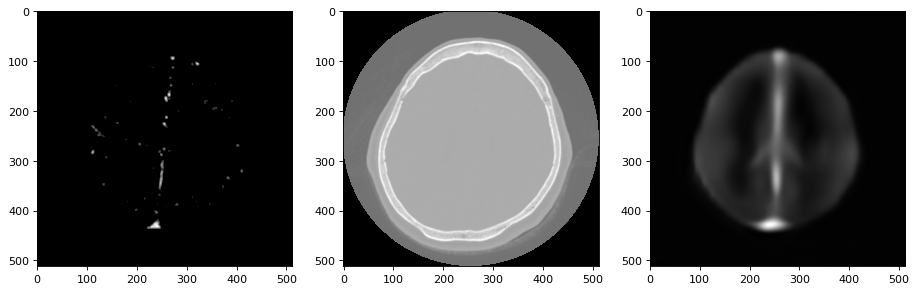

a_1.npy


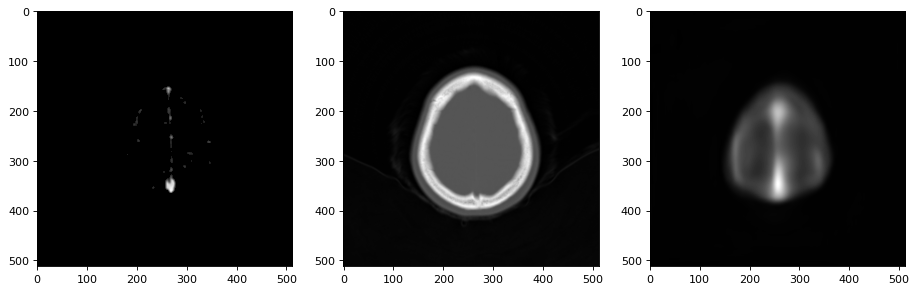

a_2.npy


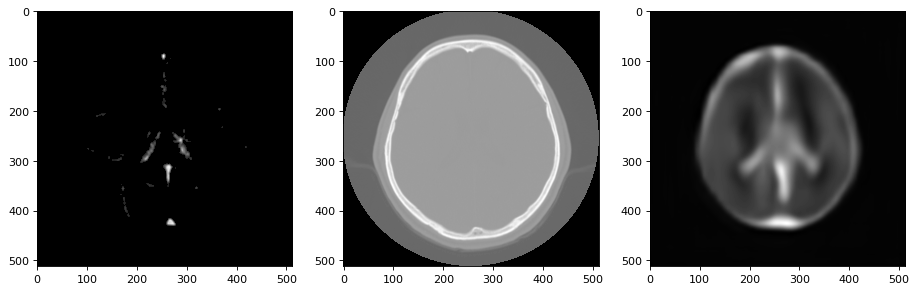

a_3.npy


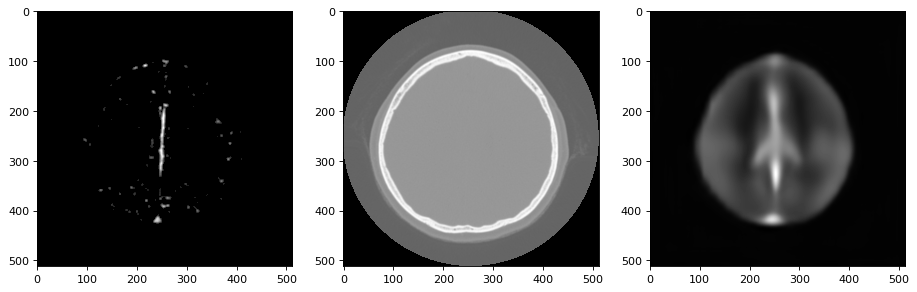

a_4.npy


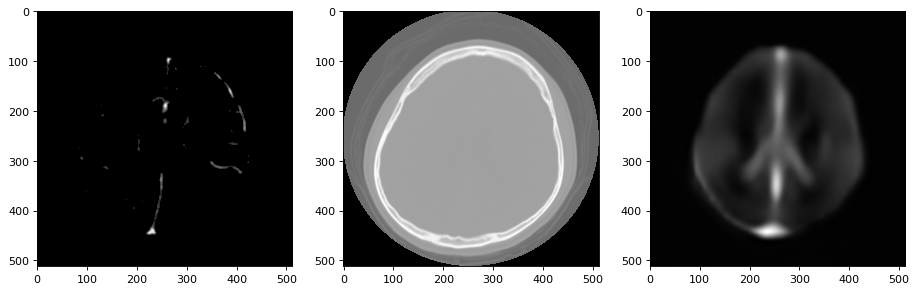

a_5.npy


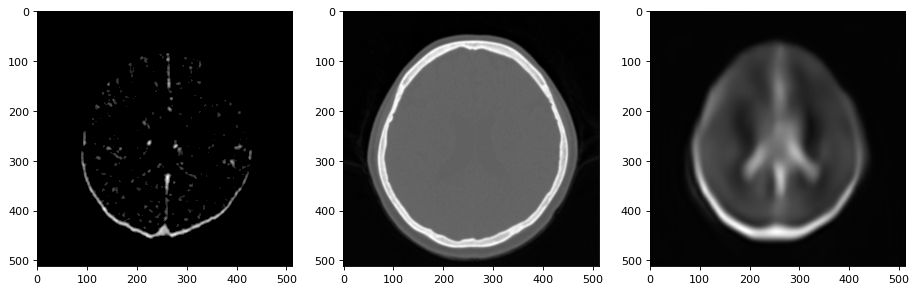

a_6.npy


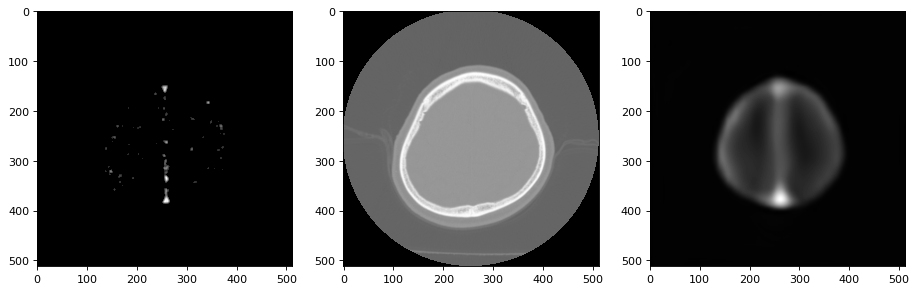

a_7.npy


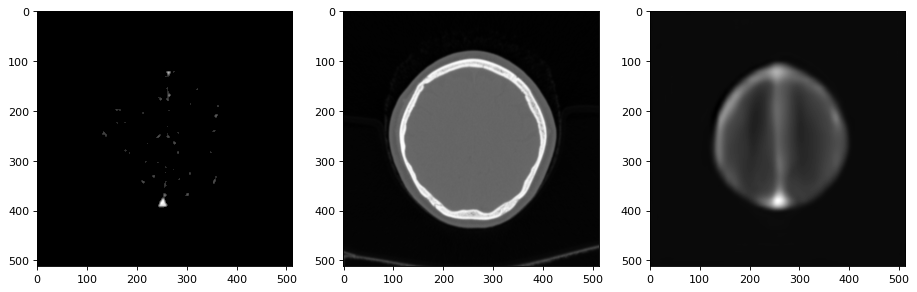

In [16]:
%matplotlib inline
import tensorflow as tf 
import os 
import matplotlib.pyplot as plt 
import numpy as np


def apply_window(img, window_level=1040, window_width=200):
    img[img<window_level - window_width/2.0] = window_level - window_width / 2.0
    img[img>window_level + window_width/2.0] = window_level + window_width / 2.0

    a = 255.0 / window_width
    b = 255.0 / (0.5 - window_level / window_width)
    img = img * a + b
    return img

def preprocessing(name):
    img1 = plt.imread(name)
    img1 = np.array(img1)
#     img1 = img1 * 4096.0 / 255.0
    return img1[:,:,1]
#     return np.mean(img1, axis=2)

def normalize(img):
    img = img - np.min(img) 
    img = img / np.max(img) * 255
    return img

def print_dist(img):
    print ('mean :%4f, max: %4f, min: %4f'%(np.mean(img), np.max(img), np.min(img)))

def npload(name, ap=True):
    img = np.load(name)
    if ap:
        img = apply_window(img, 1040, 200)
    return img

def to_RGB_r(img_gray):
    h, w = img_gray.shape
    out = np.zeros((h,w,3))
#     img_gray[img_gray < 10] = 0.0
    out[:,:,0] = img_gray / 255.0
    
#     out[:,:,1] = img_gray
#     out[:,:,2] = img_gray
    return out

def to_RGB(img_gray):
    h, w = img_gray.shape 
    out = np.zeros((h,w,3))
    out[:,:,0] = img_gray / 255.0
    out[:,:,1] = img_gray / 255.0
    out[:,:,2] = img_gray / 255.0
    return out

def overlay_imgs(a, x, alpha=.6):
    act = npload(a, ap=False) 
    act = normalize(act)
    act = to_RGB_r(act) 
    
    bgi = npload(x)
    bgi = normalize(bgi)
    bgi = to_RGB(bgi)
    
#     h, w, _ = bgi.shape 
#     for _h in range(h):
#         for _w in range(w): 
#             if np.mean(act[_h, _w, :]) > 0.08:
#                 bgi[_h, _w, :] = act[_h, _w, :]
    
    add = (bgi  + act * 2)  / 3
    add[add > 255] = 255
    return add

    

    
img_list = os.listdir('./')

a = []
x = [] 
y = [] 

for img_name in img_list:
    if img_name[0] == 'a':
        a.append(img_name)
    if img_name[0] == 'x':
        x.append(img_name)
    if img_name[0] == 'y':
        y.append(img_name)
       

a.sort()
x.sort()
y.sort()


# xx = np.load('p.npy')
# xx = xx[0]
# xx = np.reshape(xx, [103*103, 9,9])

# for i in range(50):
#     img = xx[i]
#     plt.imshow(img) 
#     plt.show()
    


for _a, _x, _y in zip(a, x, y):
    print (_a)
    fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(131)
    img = npload(_y, ap=False) 
    plt.imshow(img, cmap='gray')
    
    plt.subplot(132)
    img = npload(_x, ap=False)
    plt.imshow(img, cmap='gray')
    
    plt.subplot(133)
    img = npload(_a, ap=False)
    plt.imshow(img, cmap='gray')
    
#     plt.subplot(144)
#     ov = overlay_imgs(_a, _x)
#     plt.imshow(ov)
    plt.show()
    
    
    
    
    
    
    
#     xs, ys = np.where(img1 > np.mean(img1))
#     a = np.zeros(np.shape(img1))
#     a[xs, ys] = 1
        
#     img2 = preprocessing(y) 
#     img3 = preprocessing(z) 
    
#     fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
    
    
    
